In [1]:
# Import QUEER library
import queer
from queer import *
from queer.utils import path_create

import matplotlib.pyplot as plt
import numpy as np

In [2]:
k_points = 200
custom_points = [
    [0, 0, 0],     # Gamma
    [1/2, 0, 0],   # M
    [1/3, 1/3, 0], # K
    [0, 0, 0]      # Back to Gamma
]

# Create the path
corner_points, path = path_create(k_points, custom_points)

# Define symmetry points and labels
sym = corner_points
labels = ['Γ', 'M', 'K', 'Γ']

In [6]:
"""
Example script for calculating and plotting electronic band structure
along high-symmetry paths in the Brillouin zone.
"""

# Input files
file_path = "./examples/input/"
nscf = "nscf.out"
wout = "NbSe2.wout"
hr = "wannier_hr.dat"

# Number of k points along the path

# Energy axis limits
ylim = [-2, 2]

model = queer.model(hr, file_path, nscf,read_ef=True)

Calculating band structure...
Plotting band structure...


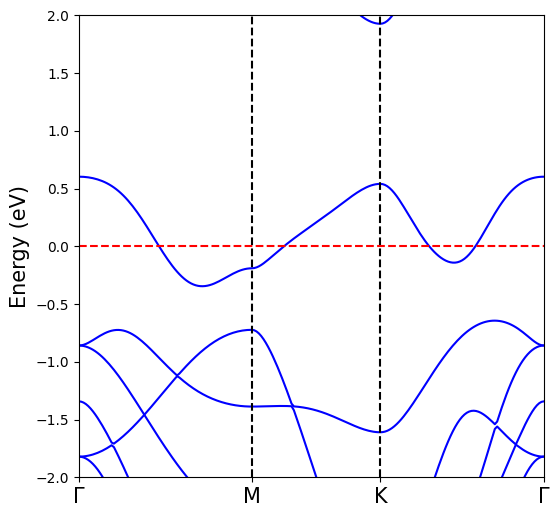

In [9]:
    
# Optional: apply a shift to the Fermi energy if needed
# model = queer(file_path, nscf, wout, hr, shift=0.1)

# Calculate band dispersion along the path
print("Calculating band structure...")
bands = model.calculate_energy(path)

# Plot bands
print("Plotting band structure...")
model.plot_electron_path(
    bands, sym, labels, ylim)



In [11]:
"""
Example script for creating a 2D plot for a given mesh size
"""
from queer import *
from queer.model import model, mesh_crystal, plot_electron_mesh
import matplotlib.pyplot as plt
import numpy as np

# Input files and parameters
file_path = "./examples/input/"
nscf = "nscf.out"
wout = "NbSe2.wout" 
hr = "wannier_hr.dat"

# Mesh size (N x N)
N = 100  # This defines an N x N mesh in k-space

# Define which band to plot (usually the one crossing the Fermi level)
metallic_band_index = 6  # This is the band index (0-based) that you want to visualize

# Initialize the model
queer_model = model(hr=hr, path=file_path, nscf=nscf)

# Create the mesh in k-space (returns a 2D mesh in crystal coordinates)
k_mesh = mesh_crystal(N, dimension=2)

# Calculate the band structure on the mesh
print("Calculating band structure on mesh...")
bands = queer_model.calculate_energy(k_mesh)

# Plot the selected band on the mesh
print("Creating 2D plot...")
plot_electron_mesh(
    band=bands,             # Band energies 
    N=N,                   # Mesh size
    metallic_band_index=metallic_band_index,  # Which band to plot
    xlim=2,                # x-axis limits for the plot
    ylim=2,                # y-axis limits for the plot
    plot_factor=5,         # Size factor for the plot
    save="band_mesh_2d.png",  # Save the plot to a file
    cmap='jet'             # Colormap to use
)

# If you want to customize the plot further:
plt.title(f"Band {metallic_band_index} on {N}x{N} mesh")
plt.show()

# Alternative: You can also create a Fermi surface plot if you want
# This shows where the band crosses the Fermi level
print("Creating Fermi surface plot...")
from queer.model import plot_fs

# Plot the Fermi surface for the metallic band
fs_thickness = 0.01  # Energy window around Fermi level
plot_fs(
    band=bands[metallic_band_index],  # Select the metallic band
    fs_thickness=fs_thickness,        # Energy window around E_F
    title=f"Fermi Surface (E_F ± {fs_thickness} eV)"
)

Calculating band structure on mesh...


ValueError: shape-mismatch for sum